In [ ]:
#installation package kaggla
! pip install -q kaggle 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#creation d'un dossier kaggle
! mkdir ~/.kaggle/

In [ ]:
#copier kaggle.json dans le dossier kaggle
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
#! pip install -q neurokit2

In [ ]:
### Import required packages
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Helps to obtain the FFT
import scipy.fftpack    
# Various operations on signals (waveforms)
import scipy.signal as signal
                                

In [ ]:
#donner les droits à kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d anashattay/ecg-heart

  0% 0.00/456k [00:00<?, ?B/s]
100% 456k/456k [00:00<00:00, 95.4MB/s]


In [ ]:
! unzip /content/ecg-heart.zip -d ecg-heart

Archive:  /content/ecg-heart.zip
  inflating: ecg-heart/Cartier_sansEM_ECG.csv  


In [ ]:
! pip install -q heartpy

     |████████████████████████████████| 1.0 MB 5.5 MB/s 


In [ ]:
df = pd.read_csv("Cartier_sansEM_ECG.csv")
df1=df[df.index<5000]
y = [e for e in df1.ECG
    ]

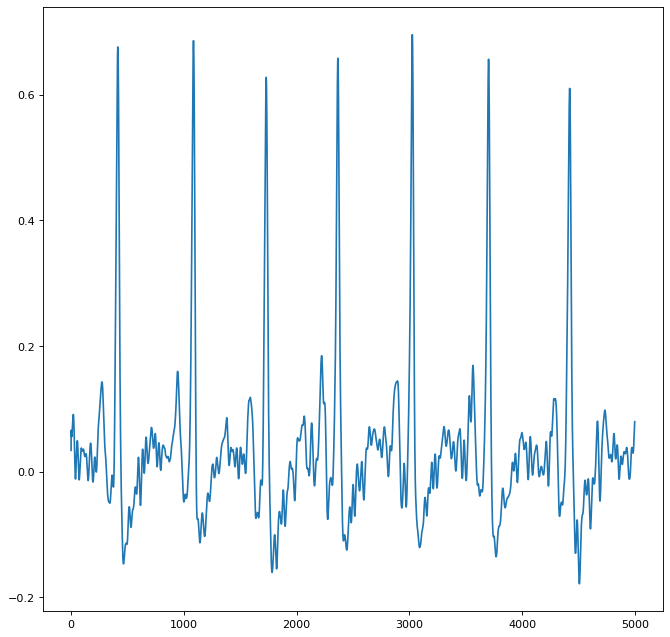

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.plot(y)

In [ ]:
import heartpy as hp
import heartpy.filtering

In [ ]:
#Import data 
hdata=hp.get_data('Cartier_sansEM_ECG.csv',)
#Slicing Data (10 essais)
hdata=hdata[1:22250]


In [ ]:
#BIGGER IMAGE
plt.rcParams['figure.figsize'] = [40, 10] 

numpy.ndarray

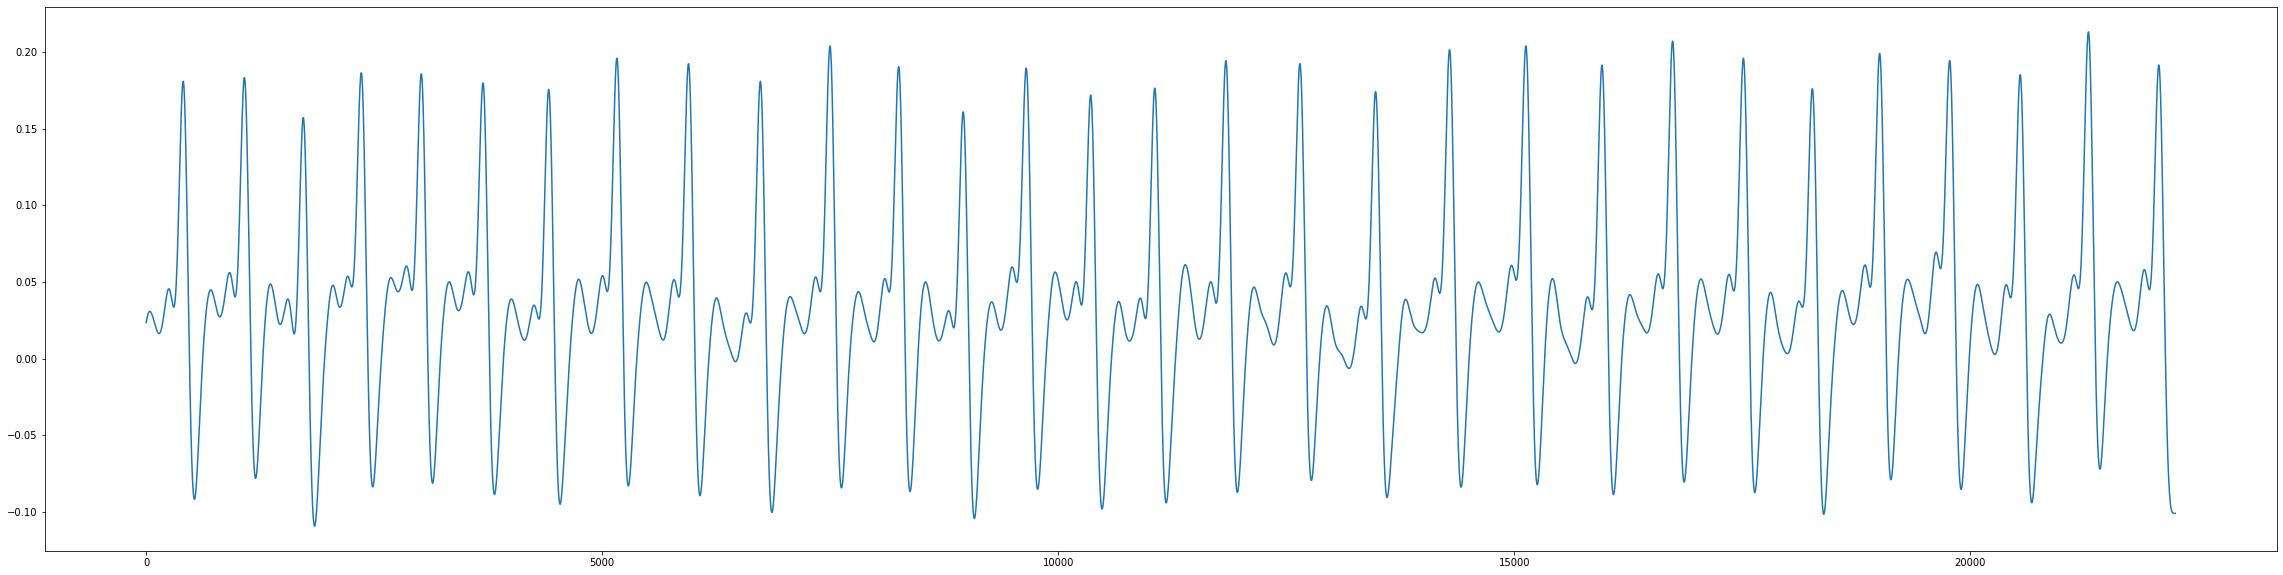

In [ ]:
#Filtring Signal (lowpass)
filtered = hp.filter_signal(hdata, cutoff = 5, sample_rate = 1000.0, order = 3, filtertype='lowpass')
plt.plot(filtered)
type(filtered)

[406,
 1077,
 1723,
 2359,
 3017,
 3693,
 4414,
 5161,
 5947,
 6735,
 7498,
 8251,
 8958,
 9649,
 10356,
 11059,
 11839,
 12650,
 13480,
 14291,
 15128,
 15962,
 16737,
 17513,
 18269,
 19007,
 19775,
 20548,
 21296,
 22068]

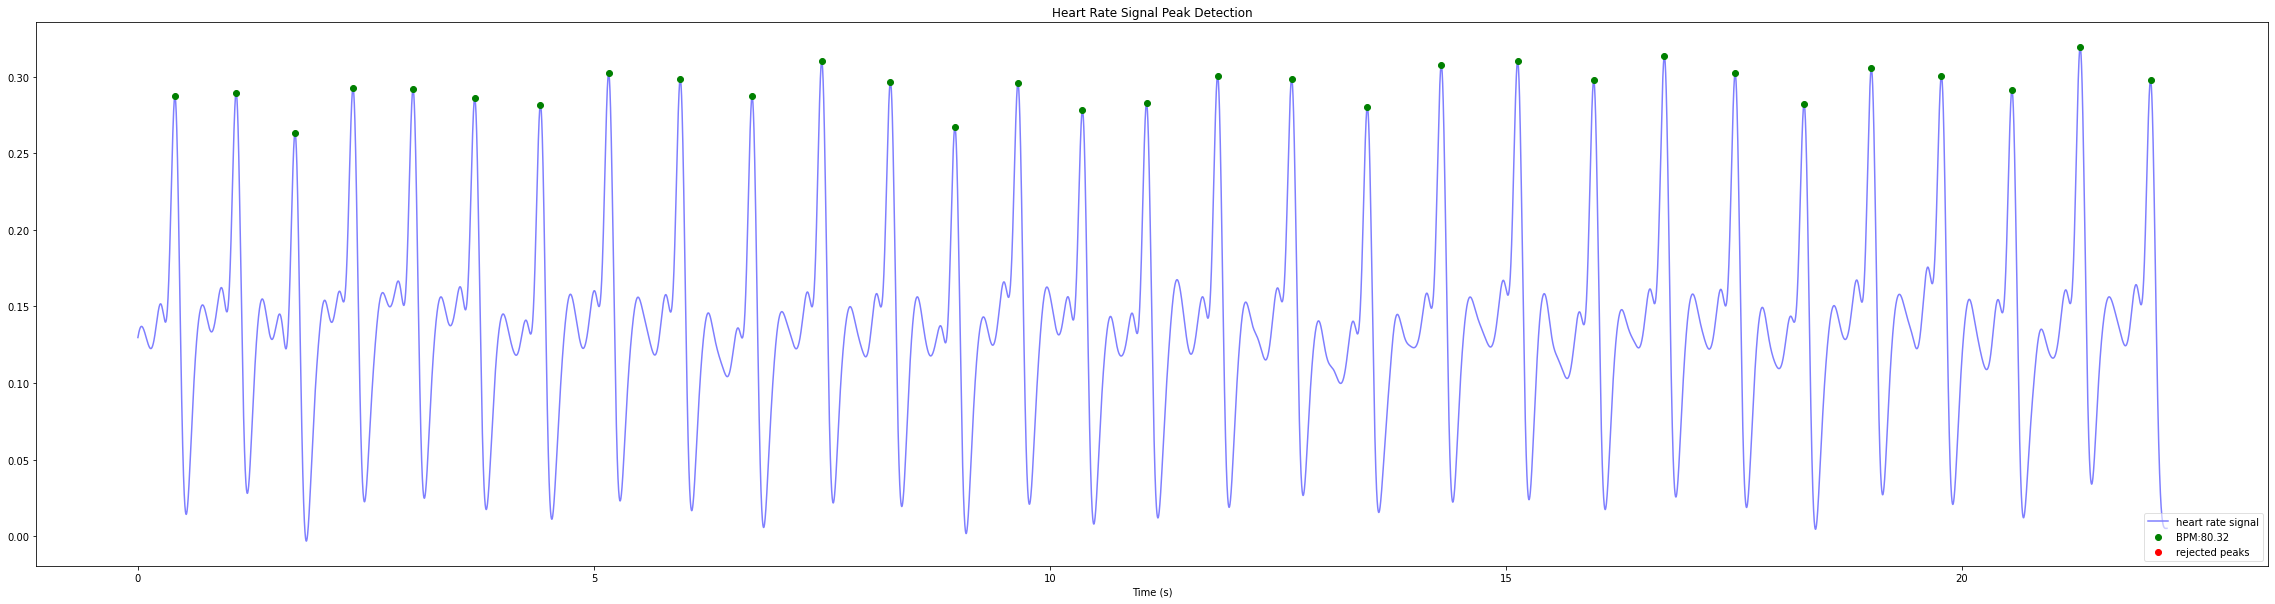

In [ ]:

w,m=hp.process(filtered,1000.0)
hp.plotter(w,m)
peaks=w['peaklist']
peaks


In [ ]:
len(peaks)

30

In [ ]:
#HEART RATE FROM SCRATCH
RR_list = []
cnt = 0
fs=1000
while (cnt < (len(peaks)-1)):
    RR_interval = (peaks[cnt+1] - peaks[cnt]) #Calculate distance between beats in # of samples
    ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1

bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
print ("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

Average Heart Beat is: 80.3


In [ ]:
'Le rythme cardiaque est égal : %.3f' %m['bpm']

'Le rythme cardiaque est égal : 80.325'

In [24]:
#loading database 
df2 = pd.read_csv("SSRT_decourstemporel-Stopsignal.csv")

In [25]:
df2.head()

,durée des essais (ms),Décours temporel des essais(ms),Décours temporel du signal stop (ms),stop,RT (GO),SSRT
0,2250.0,2250.0,2250.0,stop,644.0,144.0
1,2250.0,4500.0,NaN,NaN,445.0,NaN
2,2250.0,6750.0,NaN,NaN,650.0,NaN
3,2250.0,9000.0,9000.0,stop,0.0,NaN
4,2250.0,11250.0,11250.0,stop,637.0,137.0


In [26]:
ListeTime=df2['Décours temporel des essais(ms)'].tolist()
ListeTime=ListeTime[0:10]
ListeTime

[2250.0,
 4500.0,
 6750.0,
 9000.0,
 11250.0,
 13500.0,
 15750.0,
 18000.0,
 20250.0,
 22500.0]

In [27]:
Stop=df2['stop'].tolist()
Stop

['stop',
 nan,
 nan,
 'stop',
 'stop',
 nan,
 'stop',
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 'stop',
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 nan,
 nan,
 'stop',
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 'stop',
 nan,
 nan,
 nan,
 'stop',
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 'stop',
 nan,
 'stop',
 'stop',
 nan,
 nan,
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 'stop',
 nan,
 nan,
 nan,
 nan,
 nan,
 'stop',
 'stop',
 nan,
 

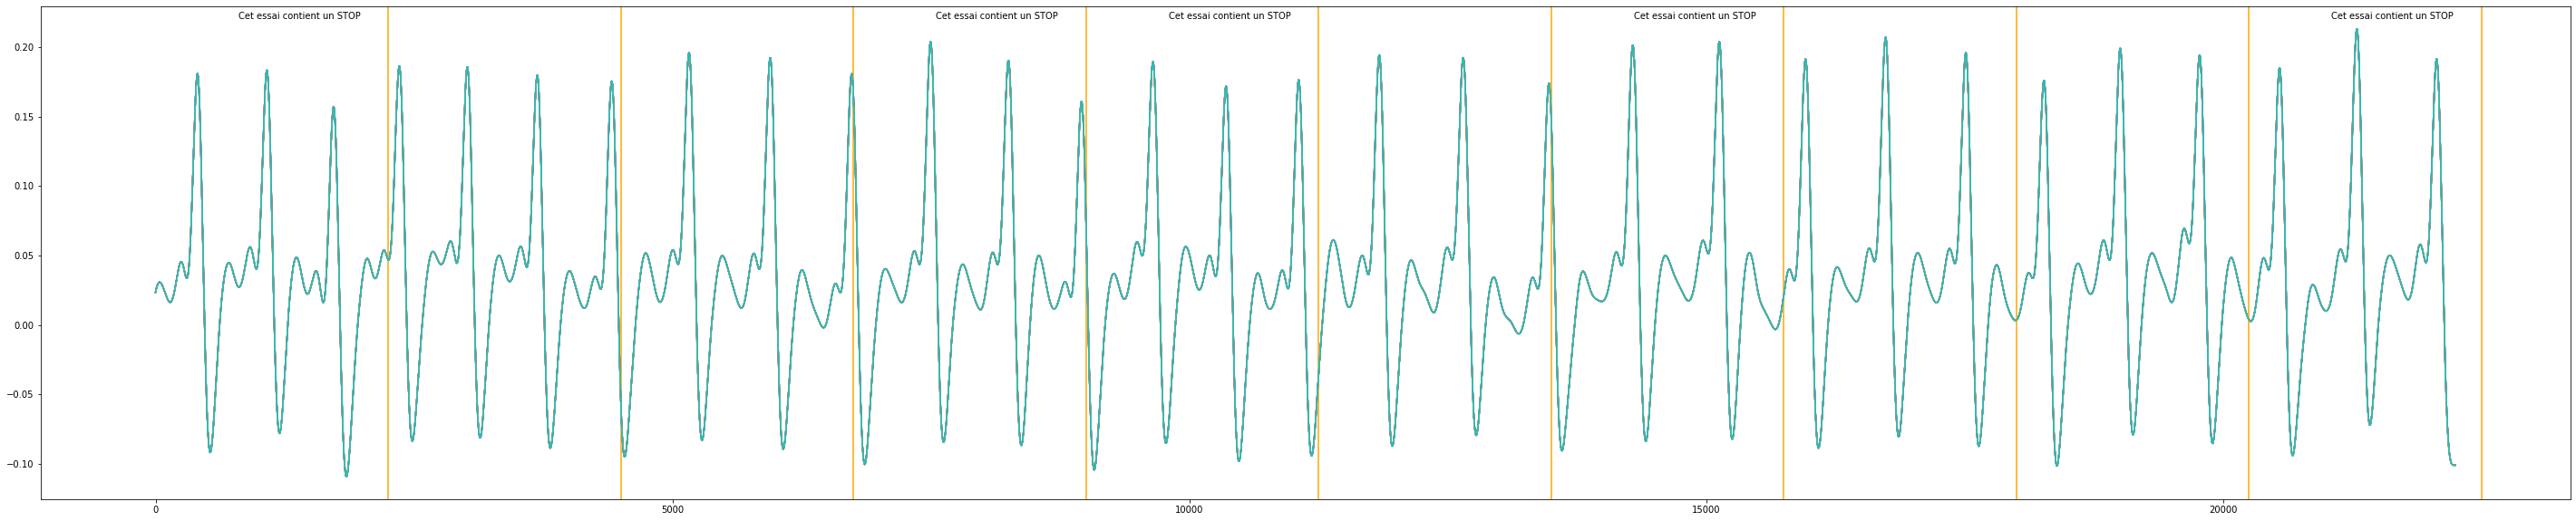

In [28]:
#Signal Delimitation 
plt.rcParams['figure.figsize'] = [50, 10] 
fig, ax = plt.subplots()


for i in range(len(ListeTime)):

# get first signal range
  signal_start =ListeTime[i]
  
  if Stop[i]=='stop' :
    text_area=(signal_start+signal_start-2900)//2
    plt.text(text_area,0.22,'Cet essai contient un ''STOP' '')
  

  ax.plot(filtered)
# get x index of first signal
  

  ax.axvline(x=signal_start, color='orange')
  
 


plt.show()

In [29]:
peaks

[406,
 1077,
 1723,
 2359,
 3017,
 3693,
 4414,
 5161,
 5947,
 6735,
 7498,
 8251,
 8958,
 9649,
 10356,
 11059,
 11839,
 12650,
 13480,
 14291,
 15128,
 15962,
 16737,
 17513,
 18269,
 19007,
 19775,
 20548,
 21296,
 22068]

In [68]:
Plist=[]  
ListPeaks=[]
seuil=2250
for e in peaks :
  if (e<seuil) :
    Plist.append(e)
  else: 
    
    ListPeaks.append(Plist) 
    Plist=[]  
    Plist.append(e)
    seuil+=2250
    
ListPeaks.append(Plist) 
print(ListPeaks)

[[406, 1077, 1723], [2359, 3017, 3693, 4414], [5161, 5947, 6735], [7498, 8251, 8958], [9649, 10356, 11059], [11839, 12650, 13480], [14291, 15128], [15962, 16737, 17513], [18269, 19007, 19775], [20548, 21296, 22068]]


In [74]:
fs=1000
HR=[]
j=-1
for i in range(len(ListPeaks)):
  P=ListPeaks[i] 
  d=P[-1]-P[0]
  HR.append((fs/d)*60*2250*(10**(-3)))

HR

[102.50569476082005,
 65.69343065693431,
 85.7687420584498,
 92.46575342465752,
 95.74468085106382,
 82.26691042047531,
 161.29032258064518,
 87.04061895551257,
 89.64143426294821,
 88.81578947368422]

In [77]:
stopgo=[]
for i in range(len(ListeTime)):
  if Stop[i]=='stop' :
    stopgo.append('stop')
  else:
    stopgo.append('go')

stopgo

['stop', 'go', 'go', 'stop', 'stop', 'go', 'stop', 'go', 'go', 'stop']

In [83]:

data_dic={'HR': HR , 'GO/STOP':stopgo}
data_dic
dfStopGo = pd.DataFrame(data_dic)
dfStopGo



,HR,GO/STOP
0,102.505695,stop
1,65.693431,go
2,85.768742,go
3,92.465753,stop
4,95.744681,stop
5,82.266910,go
6,161.290323,stop
7,87.040619,go
8,89.641434,go
9,88.815789,stop


In [75]:
HRV=[]
for i in range(len(HR)-1):
  HRV.append(HR[i+1]-HR[i])
HRV

[-36.81226410388574,
 20.075311401515492,
 6.697011366207718,
 3.278927426406298,
 -13.477770430588507,
 79.02341216016987,
 -74.24970362513261,
 2.6008153074356386,
 -0.8256447892639898]

In [32]:
df2

,durée des essais (ms),Décours temporel des essais(ms),Décours temporel du signal stop (ms),stop,RT (GO),SSRT
0,2250.0,2250.0,2250.0,stop,644.0,144.0
1,2250.0,4500.0,NaN,NaN,445.0,NaN
2,2250.0,6750.0,NaN,NaN,650.0,NaN
3,2250.0,9000.0,9000.0,stop,0.0,NaN
4,2250.0,11250.0,11250.0,stop,637.0,137.0
...,...,...,...,...,...,...
220,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
TRGOmoyen=df2['RT (GO)'].mean()
TRGOmoyen

584.90625

In [34]:
df2['SSD']=TRGOmoyen-df2['SSRT']

In [76]:
df2

,durée des essais (ms),Décours temporel des essais(ms),Décours temporel du signal stop (ms),stop,RT (GO),SSRT,SSD
0,2250.0,2250.0,2250.0,stop,644.0,144.0,440.90625
1,2250.0,4500.0,NaN,NaN,445.0,NaN,NaN
2,2250.0,6750.0,NaN,NaN,650.0,NaN,NaN
3,2250.0,9000.0,9000.0,stop,0.0,NaN,NaN
4,2250.0,11250.0,11250.0,stop,637.0,137.0,447.90625
...,...,...,...,...,...,...,...
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


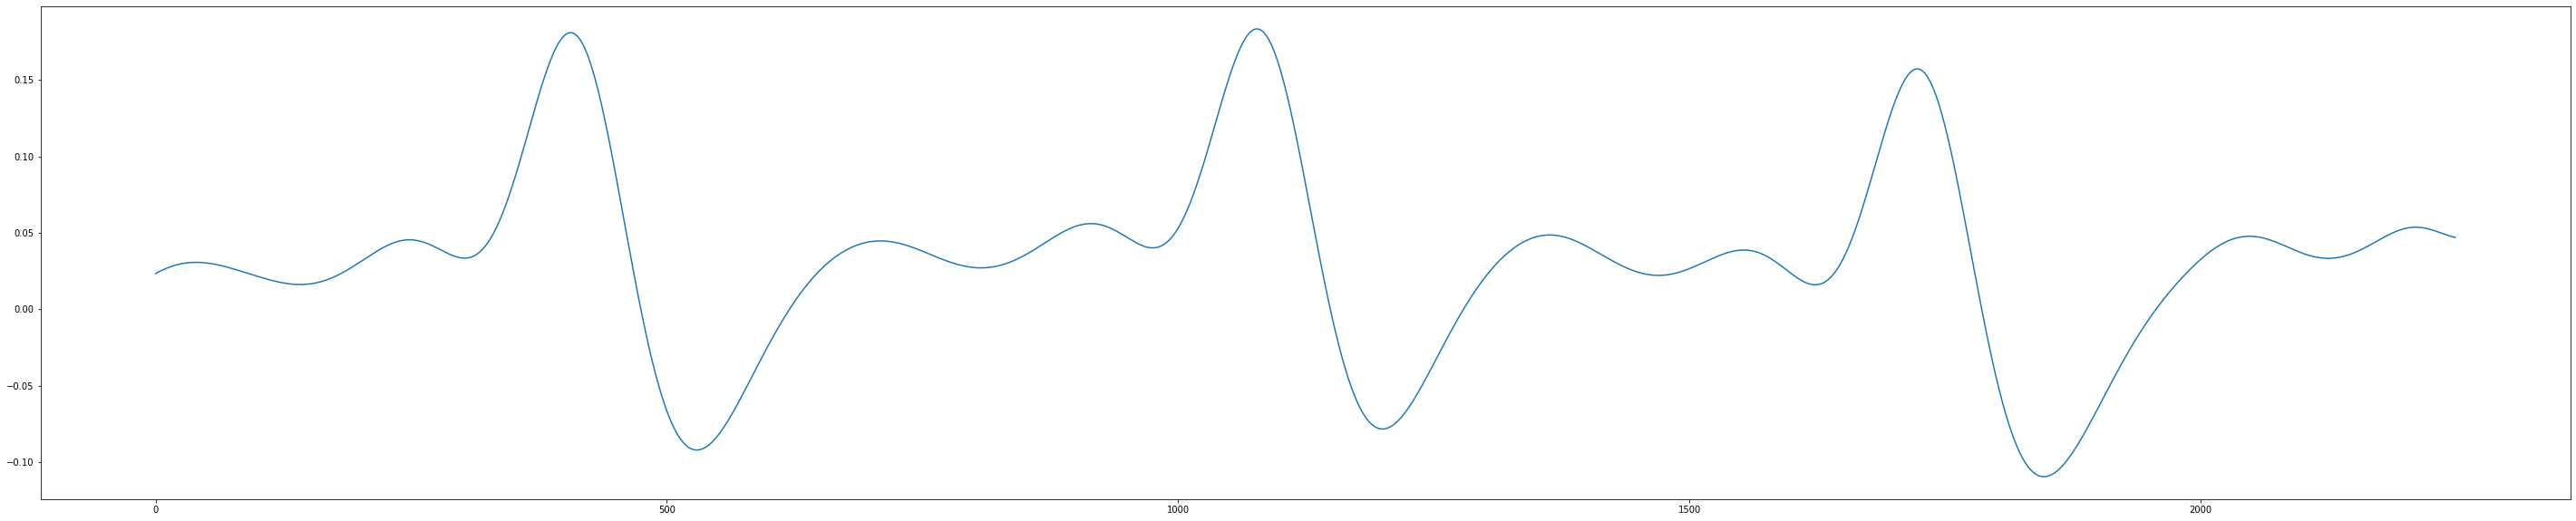

In [35]:
plt.plot(filtered[0:2250])

406

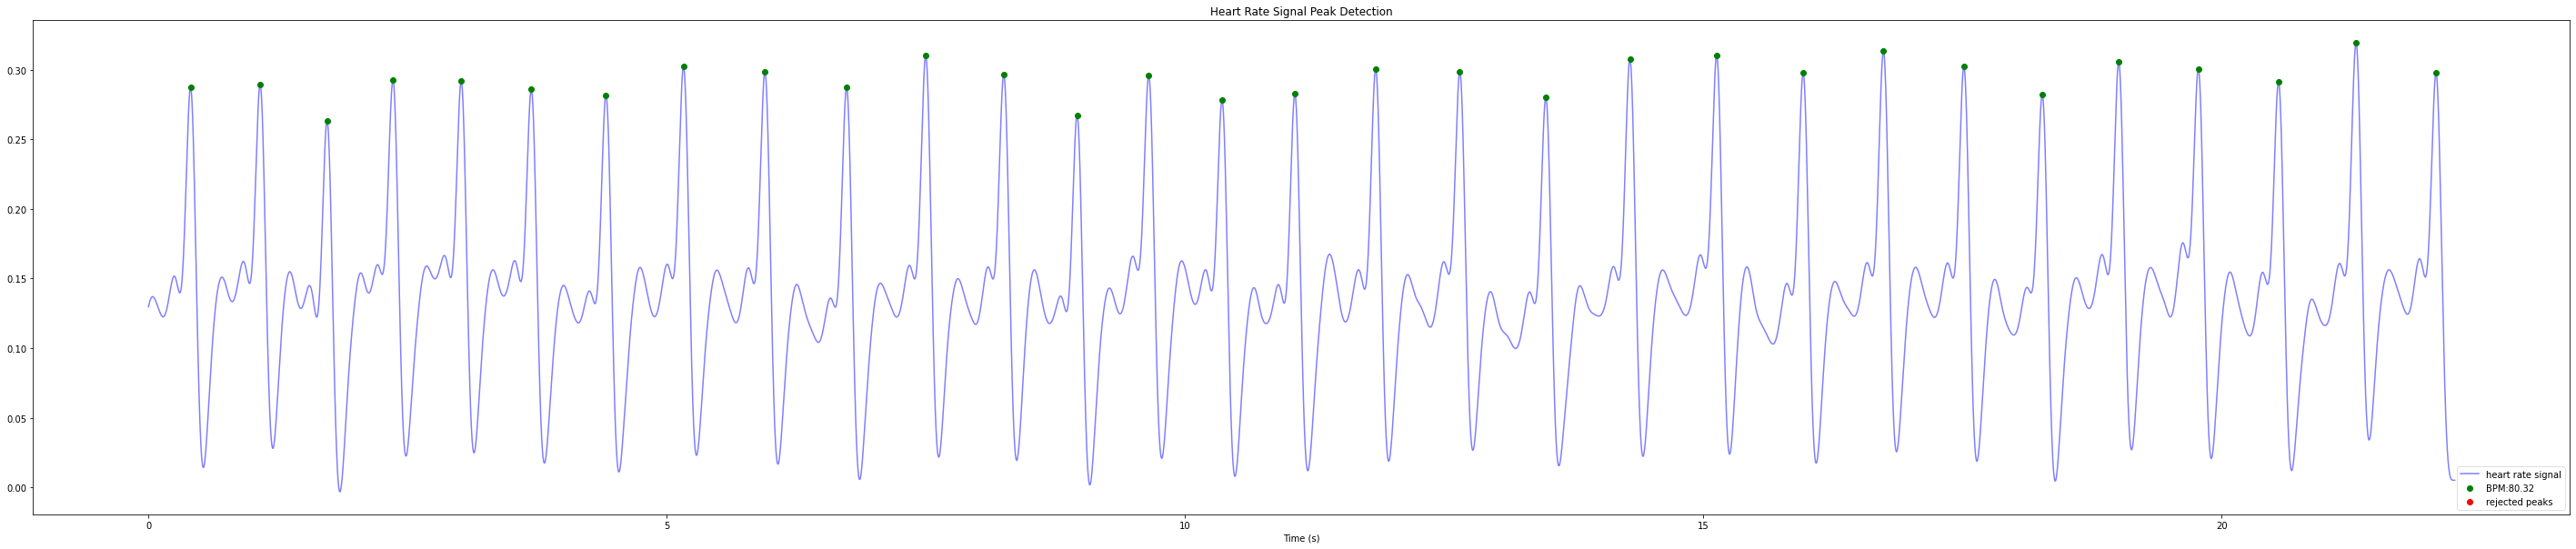

In [36]:
w,m=hp.process(filtered,1000.0)
hp.plotter(w,m)
peaks=w['peaklist']
peaks[0]

In [ ]:
# create a normalized Hanning window
windowSize = 120
window = np.hanning(windowSize)
window = window / window.sum()

# filter the data using convolution
filtered1 = np.convolve(window,hdata, mode='valid')
plt.plot(filtered1)